![terrainbento logo](../../../media/terrainbento_logo.png)


# terrainbento model Basic model with real DEM

This model shows example usage of the  [Basic](../coupled_process_elements/model_basic_steady_solution.ipynb)  model from the TerrainBento package. However, this time we will download and use an SRTM DEM as the initial condition. 

In [1]:
# import required modules
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.size"] = 20
matplotlib.rcParams["pdf.fonttype"] = 42

%matplotlib inline

from landlab import imshow_grid
from landlab.io.netcdf import write_netcdf
from landlab.io import read_esri_ascii

from terrainbento import Basic
from bmi_topography import Topography

import holoviews as hv
hv.notebook_extension('matplotlib')

np.random.seed(42)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## 1. Download SRTM image using the bmi-topography package
### bmi-topography
The bmi-topography package is a data component, recently developed by coding wizard Mark Piper. For more information on how to install an use it on your own machine, check out the [bmi-topography repo](https://github.com/csdms/bmi-topography) and this [notebook on bmi-topography](https://github.com/csdms/bmi-topography/blob/main/examples/topography.ipynb).

Bmi-topography is a Python library for fetching and caching NASA Shuttle Radar Topography Mission (SRTM) land elevation data using the [OpenTopography](https://opentopography.org/) [REST ](https://portal.opentopography.org/apidocs/) [API](https://www.mulesoft.com/resources/api/what-is-an-api).

The bmi-topography library provides access to the following global raster datasets:

    SRTM GL3 (90m)
    SRTM GL1 (30m)
    SRTM GL1 (Ellipsoidal)

The library includes an API and a CLI that accept the dataset type, a latitude-longitude bounding box, and the output file format. Data are downloaded from OpenTopography and cached locally. The cache is checked before downloading new data. 

The bmi-topography API is wrapped with a [Basic Model Interface (BMI)](https://bmi.readthedocs.io/), which provides a standard set of functions for coupling with data or models that also expose a BMI. More information on the BMI can found in its [documentation](https://bmi.readthedocs.io/).


### download some data

Create an instance of `Topography` using parameters to describe

* the type of data requested,
* the geographic bounding box of the data,
* the file format (we want to save it as an ascii file), and 
* where to store the file

with the following step:


In [2]:
topo = Topography(
    dem_type="SRTMGL3",
    south=39.97,
    north=40.02,
    west=-105.32,
    east=-105.27,
    output_format="AAIGrid",
    cache_dir="DEMData//"
    )

While this step sets up a call to the OpenTopography API, it doesn't download the data. Download the data by calling the `fetch` method:

In [3]:
fname = topo.fetch()
print(fname)

/Users/beca4397/Google Drive/csdms2021_landlab_terrainbento/notebooks/landlab-terrainbento/coupled_process_elements/DEMData/SRTMGL3_39.97_-105.32_40.02_-105.27.tif


This step may take a few moments to run while the data are fetched from OpenTopography and downloaded.

The `fetch` method only downloads data; it doesn't load it into memory. Call the `load` method to open the downloaded  file and load it into an `xarray` DataArray:

In [4]:
dem = topo.load()
print(dem)

<xarray.DataArray 'SRTMGL3' (band: 1, y: 60, x: 60)>
array([[[1975, 1977, ..., 1627, 1628],
        [1934, 1943, ..., 1629, 1628],
        ..., 
        [2286, 2262, ..., 1781, 1781],
        [2261, 2245, ..., 1793, 1791]]], dtype=int32)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 40.02 40.02 40.02 40.02 ... 39.97 39.97 39.97 39.97
  * x        (x) float64 -105.3 -105.3 -105.3 -105.3 ... -105.3 -105.3 -105.3
Attributes:
    transform:   (0.000833333333, 0.0, -105.320416666684, 0.0, -0.00083333333...
    res:         (0.000833333333, 0.000833333333)
    is_tiled:    0
    nodatavals:  (0.0,)
    scales:      (1.0,)
    offsets:     (0.0,)
    units:       meters
    location:    node


Note that `load` calls `fetch`, so the latter can be omitted if the goal is the get the data into memory.

## Visualize

Finally, let's visualize the downloaded elevation data.

In [5]:
# Read DEM as Lanlab grid
grid, z = read_esri_ascii(fname, name='topographic__elevation')    
#Show dem
imshow_grid(grid, "topographic__elevation",
            grid_units=("m", "m"),var_name="Elevation (m)")

/Users/beca4397/opt/anaconda3/envs/LLTB_clinic/lib/python3.9/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("pink").copy()
  cmap.set_bad(color=color_for_closed)
/Users/beca4397/opt/anaconda3/envs/LLTB_clinic/lib/python3.9/site-packages/landlab/plot/imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


Yup, this is ![Boulder](../../../media/Boulder.jpg)

## 2. Use downloaded DEM to run a terrainbento model

In [6]:
# Get properties of DEM
# Get properties of DEM 
nr = grid.number_of_node_rows
nc = grid.number_of_node_columns
dx =grid.dx
xy_of_lower_left = grid.xy_of_lower_left

print(nr)
print(nc)
print(dx)
print(xy_of_lower_left)

60
60
0.000833333333
(-105.320416666684, 39.970416666670999)


In [7]:
# create the parameter dictionary needed to instantiate the model

U = 0.001
K = 0.0001
m = 0.5
n = 1.0

params = {
    # create the Clock.
    "clock": {
        "start": 0,
        "step": 1000,
        "stop": 10000,
    },

    # Create the Grid
    "grid": {
        "RasterModelGrid": [
            (nr, nc),
            {
                "xy_spacing": dx,
                "xy_of_lower_left": xy_of_lower_left,
            },
            {
                "fields": {
                    "node": {
                        "topographic__elevation": {
                            "read_esri_ascii": [
                                fname
                            ]
                        }
                    }
                }
            },
        ]
    },

    # Set up Boundary Handlers
    "boundary_handlers": {
        "NotCoreNodeBaselevelHandler": {
            "modify_core_nodes": True,
            "lowering_rate": -U
        }
    },
    # Parameters that control output.
    "output_interval": 1e3,
    "save_first_timestep": True,
    "output_prefix": "output/RealDEM",
    "fields": ["topographic__elevation"],

    # Parameters that control process and rates.
    "water_erodibility": K,
    "m_sp": m,
    "n_sp": n,
    "regolith_transport_parameter": 1e-10, #notice, this is degrees^2/year
}

In [8]:
# initialize the model using the Model.from_dict() constructor.
# We also pass the output writer here.
model = Basic.from_dict(params)

# to run the model as specified, we execute the following line:
model.run()

In [9]:
# make a plot of the final topography
imshow_grid(model.grid, "topographic__elevation",
            grid_units=("m", "m"),var_name="Elevation (m)")

### Making a plot

terrainbento has a function called `to_xarray_dataset` that will take all the model output and combine it into one xarray datset. 
[More info on xarray datasets](http://xarray.pydata.org/en/stable/data-structures.html)

In [10]:
ds = model.to_xarray_dataset(time_unit='years', space_unit='deg')

To use Holoviews to make a plot we first create a holoviews dataset. 

In [11]:
hvds_topo = hv.Dataset(ds.topographic__elevation)

Then we make a plot. Here we are will make an image plot with a time slider. Holoviews will render each image before showing the result so executing this cell may take a few moments. 

:HoloMap   [time]
   :Image   [x,y]   (topographic__elevation)
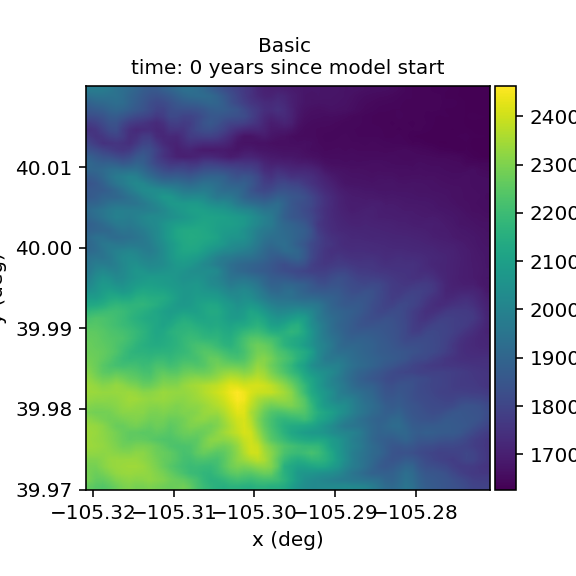
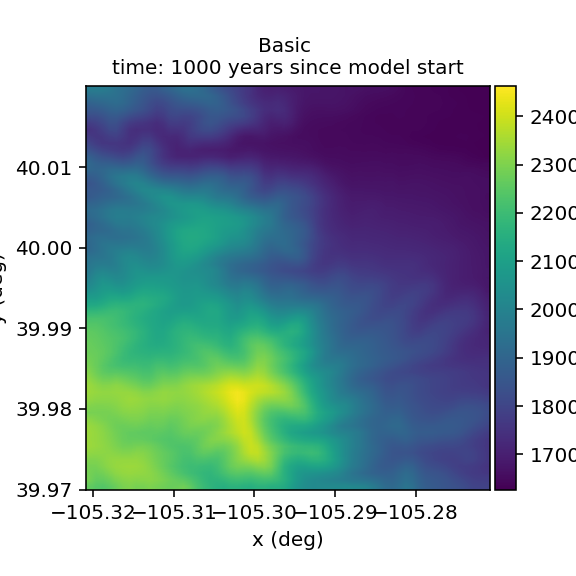
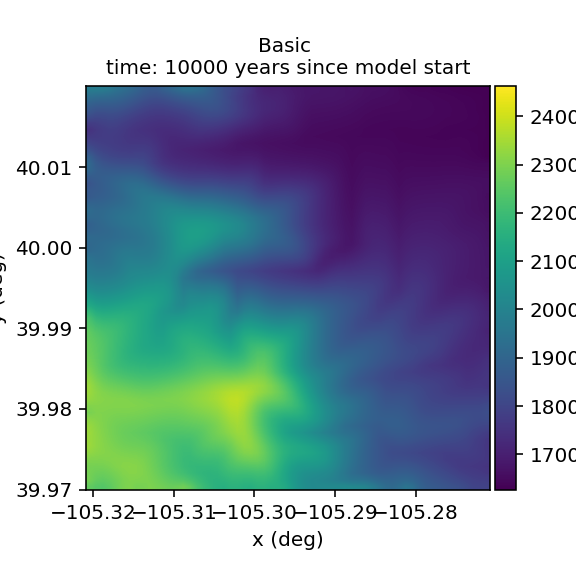
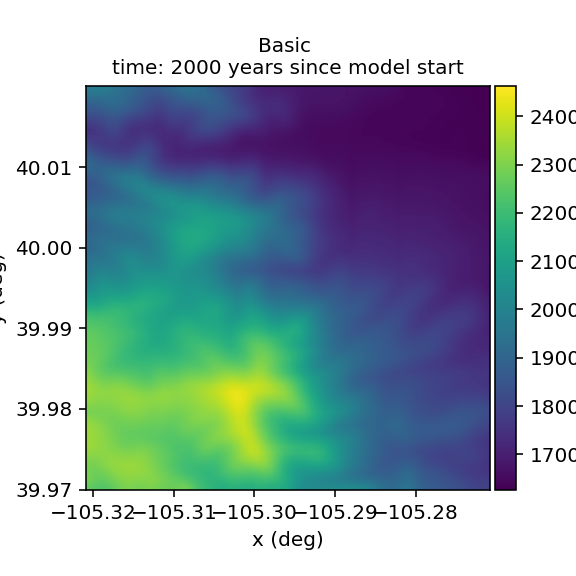
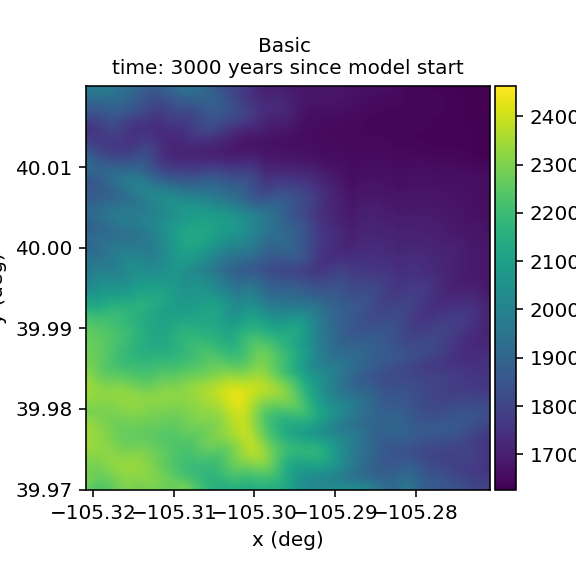
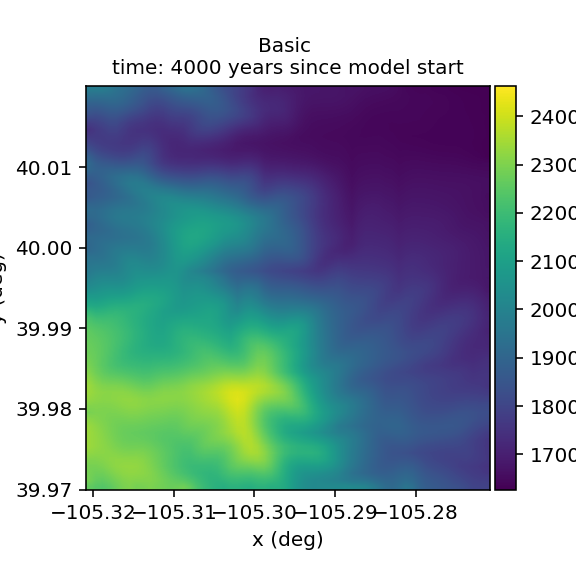
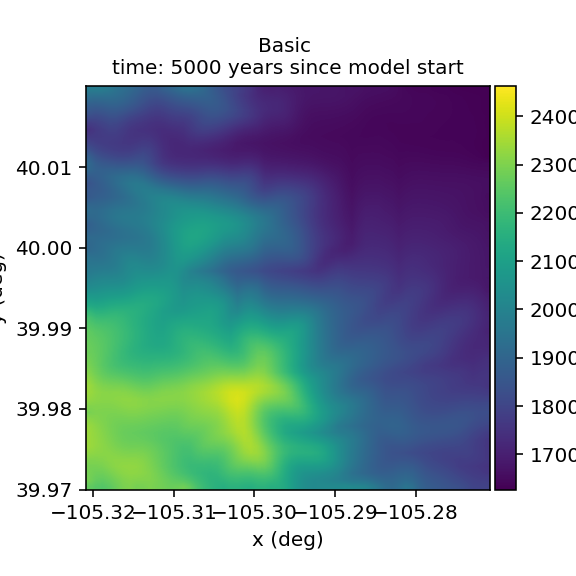
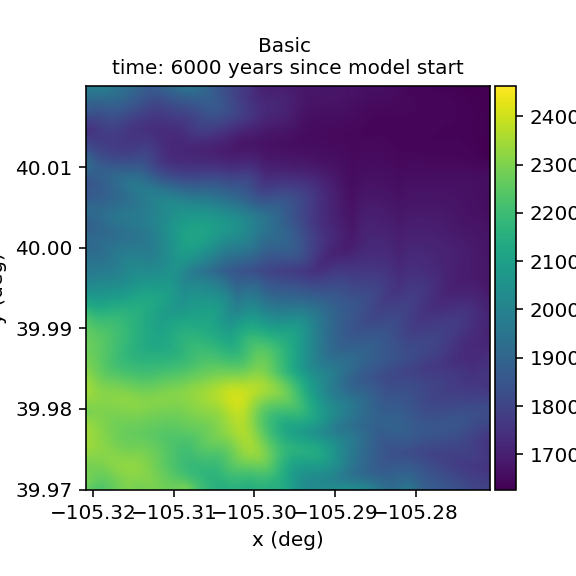
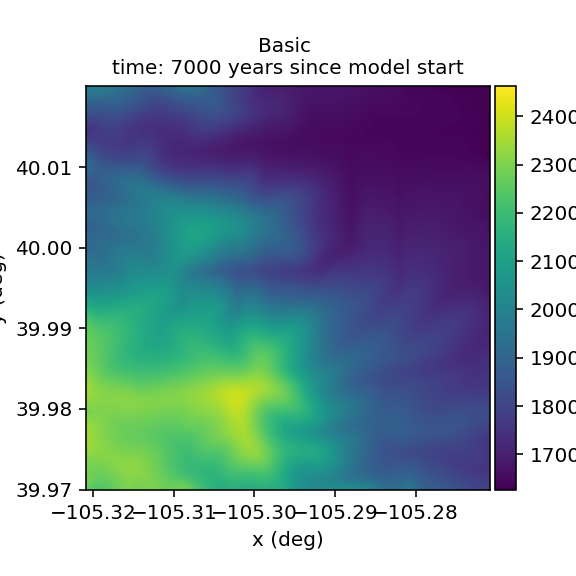
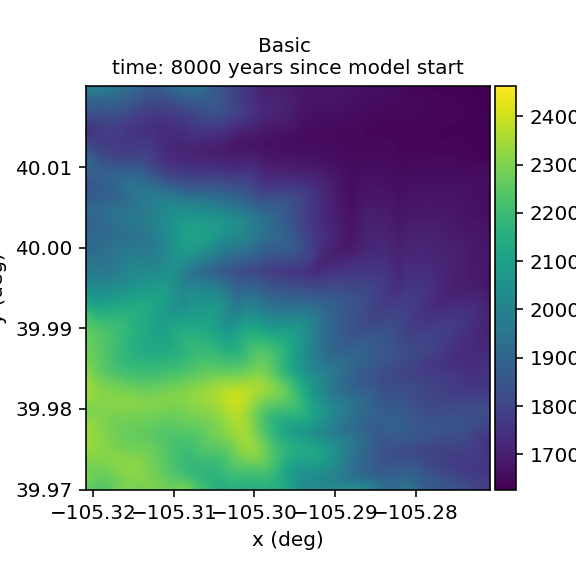
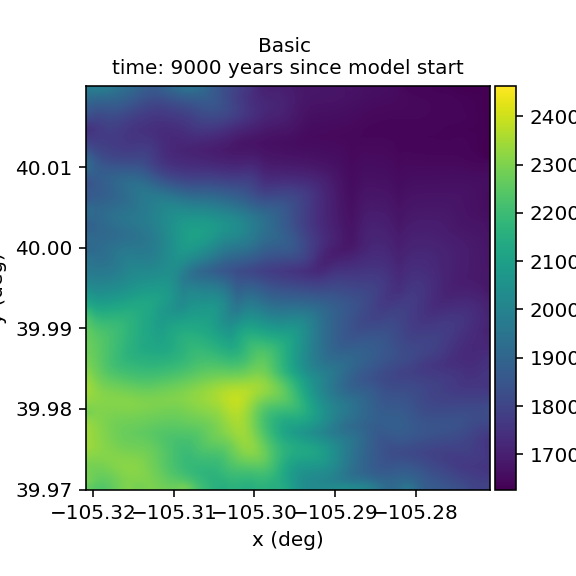
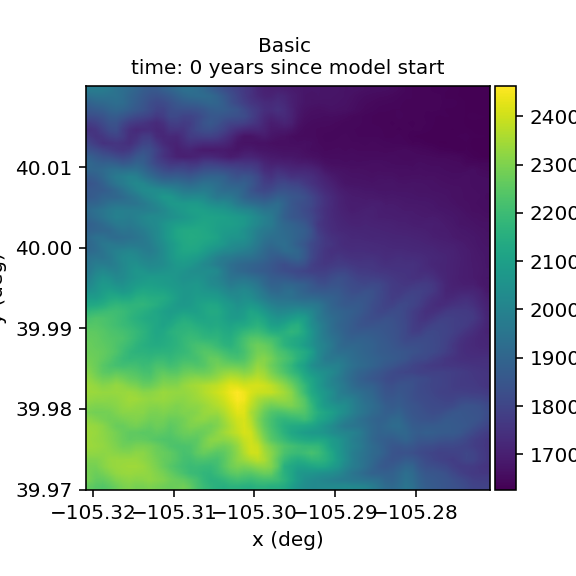

In [12]:
topo = hvds_topo.to(hv.Image, ['x', 'y'],
                    label='Basic').options(interpolation='bilinear',
                                           cmap='viridis',
                                           colorbar=True)
topo.opts(fontsize={
    'title': 10, 
    'labels': 10, 
    'xticks': 10, 
    'yticks': 10,       
    'cticks': 10,
})
topo